<a href="https://colab.research.google.com/github/shreyasat27/MSc-QT-/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 7.4 MB/s eta 0:00:00


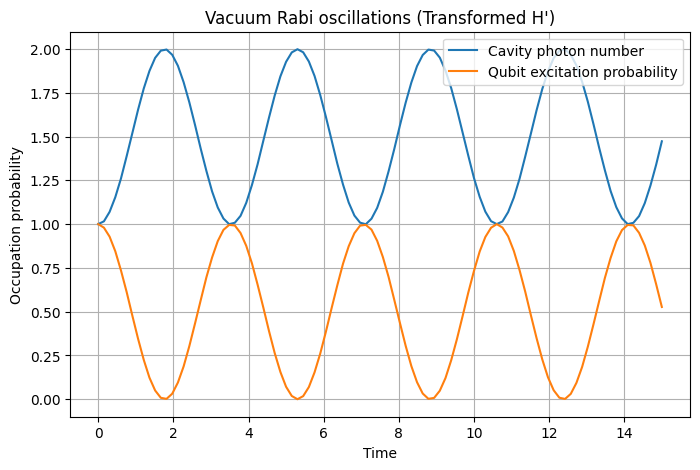

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define system parameters
omega = 2 * np.pi
g = 0.1 * 2 * np.pi  # Coupling strength
N = 3  # Number of Fock states in the cavity
theta = np.pi / 4  # Angle determining the qubit orientation
kappa = 0.00005  # Cavity dissipation rate
gamma = 0.0005  # Qubit relaxation rate
tlist = np.linspace(0, 15, 100)  # Time array for simulation
epsilon = 2 * omega * np.sin(theta)  # Energy detuning of the qubit
t_c = 1 * omega * np.cos(theta)  # Tunnel coupling between qubit states
t = 1
# Initial state
psi0 = tensor(basis(N, 1), basis(2, 0))  # Qubit in ground state, 1 photon in cavity

# Operators
a = tensor(destroy(N), qeye(2))  # Cavity annihilation operator
adag = a.dag()  # Cavity creation operator
sigma_x = tensor(qeye(N), sigmax())
sigma_z = tensor(qeye(N), sigmaz())
idn = tensor(qeye(N), qeye(2))  # Identity operator

# Hamiltonians
H_interaction = g * (a + adag) * sigma_x
H_matrix = np.sqrt(((epsilon/2)**2) + t_c**2) * sigma_z
omega_R = 2 * np.sqrt(((epsilon/2)**2) + t_c**2)
H_res = omega_R * a.dag() * a
H = H_matrix + H_interaction + H_res  # Original Hamiltonian

# Generate S = -i H0 t
H0 = omega_R * a.dag() * a - (omega / 2) * sigma_z
S = (-1j * H0*t).expm()

# Compute transformed Hamiltonian H' = e^S H e^(-S)
H_prime = S * H * S.dag()

# Solve the master equation
c_ops = []
output = mesolve(H_prime, psi0, tlist, c_ops, [a.dag() * a, (sigma_z + idn) / 2])

# Plot results
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(tlist, output.expect[0], label="Cavity photon number")
ax.plot(tlist, output.expect[1], label="Qubit excitation probability")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Occupation probability")
ax.set_title("Vacuum Rabi oscillations (Transformed H')")
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


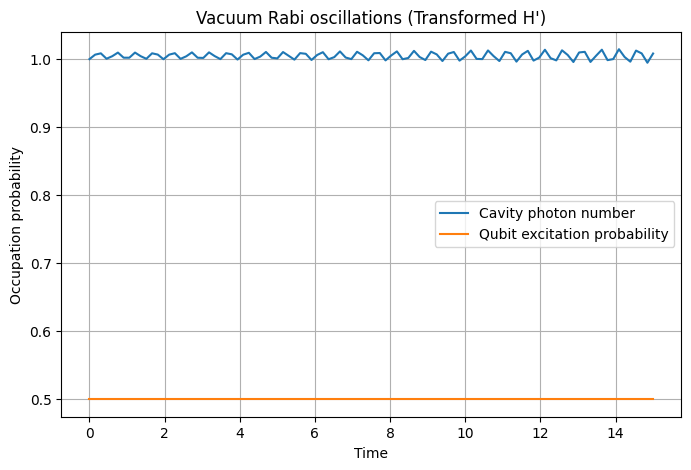

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define system parameters
omega = 2 * np.pi
g = 0.1 * 2 * np.pi  # Coupling strength
N = 3  # Number of Fock states in the cavity
theta = np.pi / 4  # Angle determining the qubit orientation
kappa = 0.00005  # Cavity dissipation rate
gamma = 0.0005  # Qubit relaxation rate
tlist = np.linspace(0, 15, 100)  # Time array for simulation
epsilon = 2 * omega * np.sin(theta)  # Energy detuning of the qubit
t_c = 1 * omega * np.cos(theta)  # Tunnel coupling between qubit states
t = 1
# Initial state
psi0 = tensor(basis(N, 1), basis(2, 0))  # Qubit in ground state, 1 photon in cavity

# Operators
a = tensor(destroy(N), qeye(2))  # Cavity annihilation operator
adag = a.dag()  # Cavity creation operator
sigma_x = tensor(qeye(N), sigmax())
sigma_z = tensor(qeye(N), sigmaz())
idn = tensor(qeye(N), qeye(2))  # Identity operator

# Hamiltonians
H_interaction = g * (a + adag) * sigma_z
H_matrix = np.sqrt(((epsilon/2)**2) + t_c**2) * sigma_z
omega_R = 2 * np.sqrt(((epsilon/2)**2) + t_c**2)
H_res = omega_R * a.dag() * a
H = H_matrix + H_interaction + H_res  # Original Hamiltonian

# Generate S = -i H0 t
H0 = omega_R * a.dag() * a - (omega / 2) * sigma_z
S = (-1j * H0*t).expm()

# Compute transformed Hamiltonian H' = e^S H e^(-S)
H_prime = S * H * S.dag()

# Solve the master equation
c_ops = []
output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, (sigma_x+idn) / 2])


# Plot results
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(tlist, output.expect[0], label="Cavity photon number")
ax.plot(tlist, output.expect[1], label="Qubit excitation probability")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Occupation probability")
ax.set_title("Vacuum Rabi oscillations (Transformed H')")
plt.grid()
plt.show()

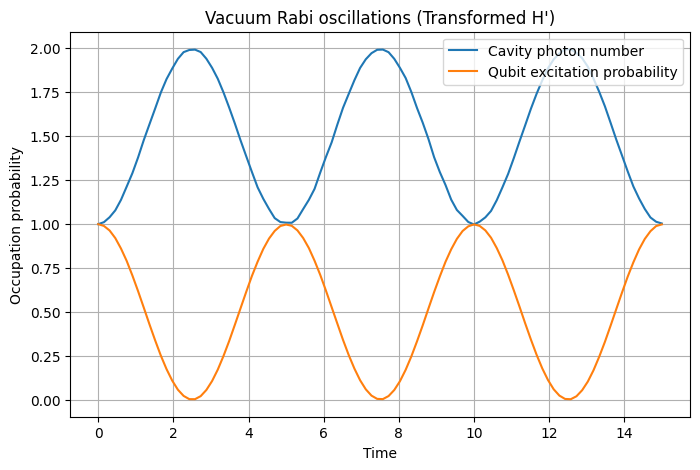

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define system parameters
omega = 2 * np.pi
g = 0.1 * 2 * np.pi  # Coupling strength
N = 3  # Number of Fock states in the cavity
theta = np.pi / 4  # Angle determining the qubit orientation
kappa = 0.00005  # Cavity dissipation rate
gamma = 0.0005  # Qubit relaxation rate
tlist = np.linspace(0, 15, 100)  # Time array for simulation
epsilon = 2 * omega * np.sin(theta)  # Energy detuning of the qubit
t_c = 1 * omega * np.cos(theta)  # Tunnel coupling between qubit states
t = 1
# Initial state
psi0 = tensor(basis(N, 1), basis(2, 0))  # Qubit in ground state, 1 photon in cavity

# Operators
a = tensor(destroy(N), qeye(2))  # Cavity annihilation operator
adag = a.dag()  # Cavity creation operator
sigma_x = tensor(qeye(N), sigmax())
sigma_z = tensor(qeye(N), sigmaz())
idn = tensor(qeye(N), qeye(2))  # Identity operator

# Hamiltonians
H_interaction = (g * (a + adag)) * (np.cos(theta) * sigma_x + np.sin(theta) * sigma_z)
H_matrix = np.sqrt(((epsilon/2)**2) + t_c**2) * sigma_z
omega_R = 2 * np.sqrt(((epsilon/2)**2) + t_c**2)
H_res = omega_R * a.dag() * a
H = H_matrix + H_interaction + H_res  # Original Hamiltonian

# Generate S = -i H0 t
H0 = omega_R * a.dag() * a - (omega / 2) * sigma_z
S = (-1j * H0*t).expm()

# Compute transformed Hamiltonian H' = e^S H e^(-S)
H_prime = S * H * S.dag()

# Solve the master equation
c_ops = []
output = mesolve(H_prime, psi0, tlist, c_ops, [a.dag() * a, (sigma_z + idn) / 2])

# Plot results
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(tlist, output.expect[0], label="Cavity photon number")
ax.plot(tlist, output.expect[1], label="Qubit excitation probability")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Occupation probability")
ax.set_title("Vacuum Rabi oscillations (Transformed H')")
plt.grid()
plt.show()
